# 🤖 Model Training Experiments
Compare performance of LSTM models by changing:
- Window size
- LSTM units
- Epochs / Batch Size

Use this notebook to tune your model setup.

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
def fetch_data(ticker):
    df = yf.download(ticker, start='2015-01-01', end='2025-01-01')
    return df[['Close']].dropna()

def prepare_data(data, window_size=60):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data)
    X, y = [], []
    for i in range(window_size, len(scaled)):
        X.append(scaled[i-window_size:i])
        y.append(scaled[i])
    return np.array(X), np.array(y), scaler

def build_model(input_shape, lstm_units=50):
    model = Sequential()
    model.add(LSTM(units=lstm_units, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [3]:
ticker = 'RELIANCE.NS'
window_size = 60
lstm_units = 64
epochs = 10
batch_size = 32

df = fetch_data(ticker)
X, y, scaler = prepare_data(df, window_size)

# Split into train and test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = build_model((X_train.shape[1], X_train.shape[2]), lstm_units=lstm_units)
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))


C:\Users\sneha\AppData\Local\Temp\ipykernel_20572\2239615005.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2015-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


Epoch 1/10
61/61 [==============================] - 3s 24ms/step - loss: 0.0142 - val_loss: 7.8232e-04
Epoch 2/10
61/61 [==============================] - 1s 18ms/step - loss: 4.9136e-04 - val_loss: 6.8088e-04
Epoch 3/10
61/61 [==============================] - 1s 17ms/step - loss: 4.5747e-04 - val_loss: 8.2954e-04
Epoch 4/10
61/61 [==============================] - 1s 17ms/step - loss: 4.1988e-04 - val_loss: 9.2917e-04
Epoch 5/10
61/61 [==============================] - 1s 17ms/step - loss: 3.9955e-04 - val_loss: 6.3881e-04
Epoch 6/10
61/61 [==============================] - 1s 18ms/step - loss: 3.8547e-04 - val_loss: 6.1047e-04
Epoch 7/10
61/61 [==============================] - 1s 17ms/step - loss: 3.6425e-04 - val_loss: 5.7391e-04
Epoch 8/10
61/61 [==============================] - 1s 17ms/step - loss: 3.6072e-04 - val_loss: 6.3824e-04
Epoch 9/10
61/61 [==============================] - 1s 17ms/step - loss: 3.3133e-04 - val_loss: 6.5861e-04
Epoch 10/10
61/61 [======================

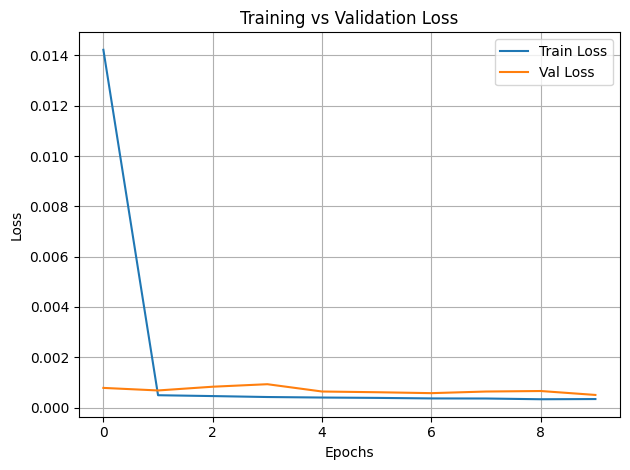

In [4]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
